# Introduction
> We are looking at the Propser Makertplace inc, listed on NYSE as (LC) is a lender who is providing average loan amount form $2,000 to $40,000. The dataset is pretty huge with 82 columns/ attributes with the range of 113,937. While their can be numerous analysis and numeous indicators for type of credit score ranges that company lends to, what is the loan terms that investors like the most? It is submprime lender or lends to high credit risk customers?  
We will explore some these question in our analsysis


In [59]:
#importing the necessary funcitons for the analysis 
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as pt

In [114]:
# read the Prosperloan data csv file to the data frame
df=pd.read_csv('prosperLoanData.csv')

In [115]:
# taking a visual inspection of the data 
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [92]:
# describe the data set to check the data types
df.info()
# a total of 83 columns in the data base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# check if any coolumns have the null values in the columns 
df.isnull().sum()
# only CreditGrade has 84984 rows with null

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
# looking at the description of the data set
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [136]:
# Looking at any duplicate rows in the data set 
df.duplicated().sum()
# There are not duplicate values in the data set.

0

In [ ]:
# changed the loan orginationdate to date and time 
df['LoanOriginationDate'] = pd.to_datetime(df_loan['LoanOriginationDate'])

# Changing the loan term from months to Year for better representation

In [10]:
# Added the column Term_Year which represents the loan term in number of years.
df['Term_Year']=df['Term'].div(12)

In [11]:
#checking the Term_Year column that has been added.
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Term_Year
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,3.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,3.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,3.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,3.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,3.0


# Uni-variate visual analysis using the simple count of the Loan Status.
>  This is to give a high level distribution of the count of loans that the company has

In [28]:
# Get the count of the Loan Stauts 
df["LoanStatus"].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

# Findings -: 
>This is to give a high level distribution of the count of loans that the company has, as it gives us a overall idea of the what is the status of the  business of the company just by number of Current, defaulted and completed loans which will help us in our question to check if credit score range resulted 5018 loans being defaulted. Overall just by looking at the count of this Loan Status variable the almost 80 to 90 percent loans are either current or completed which is good sign for Propser as lender.

# Bi-Variate analysis

# Do the investors like to invest in short term or long term loan the most?

In [29]:
# looking at the count of single variate Term _Year.
df["Term_Year"].value_counts()
# The maximum number of the loans are 3 years range, followed by 5 years and then 1 year range

3.0    87778
5.0    24545
1.0     1614
Name: Term_Year, dtype: int64

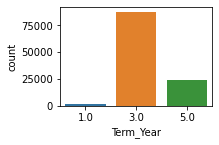

In [42]:
# plot of Term Year in bar graph to check the distribution of the Loan terms in years
fig = pt.figure()
ax1 = fig.add_subplot(221)
sn.countplot(df["Term_Year"])

# Findings
> From the display of the count and plot more that 75,000 loans are 3 year terms, 12500 loans are for 5 years terms and intresting enough only 1614 loans are 1 yeare loan. The company prefers to lend for 3 years or may be customers prefer 3 years over 1 year being two short for repayment and 5 years is long term to attract more interest.

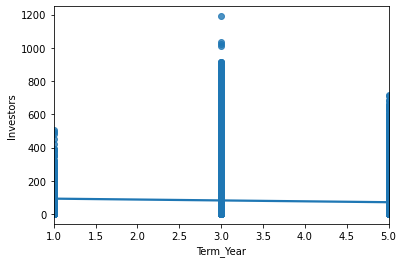

In [52]:
# The plot of investors with the Term Year to get the idea
ax=sn.regplot(x=df["Term_Year"], y=df["Investors"]);

# Findings
> Looking at the plot of Term_Year vs the Investors most number of investors like to put their money in the 3 year lon terms compared to that of 5 years. Almost a 1000 investors prefere 3 year loan term lending from the graph above. 700 investors prefer to invest in 5 year terms. Only 500 customers prefer 1 year loan terms. 

#  Is prosper a sub-prime lender? or lends money to individuals which are high credit  risk ?
>  The credit grades classify the prospective borrowers according to risk of default and correspond roughly to credit scores: 
AA (760+)
A (720-759) 
B (680-719) 
C (640-679) 
D (600-639) 
E (560-599) 
HR (520-599) 
HR stands for High Risk.

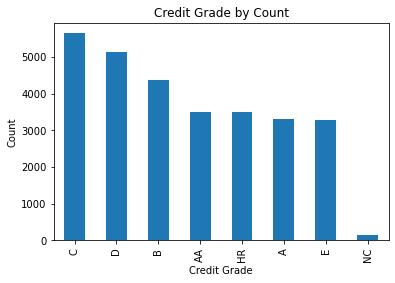

In [76]:
# Plotting of the Credit Grades and looking at which credit grades borrowed the most.
df.CreditGrade.value_counts().head(30).plot(kind = 'bar');
pt.xlabel('Credit Grade')
pt.ylabel('Count');
pt.title('Credit Grade by Count');

# Findings
The credit score range c( 640-679)had most number of borrowers, looking at the plot above HR (High risk ) individals had more than 3500 loans which is a significant amount in this case. There is probability of these individuals getting defaulte. In the subsquent section we will the get answer to this question by doing by-variate analysis.

# What is the role of the Credit score Range on the Status of loan?
> I am going to explore the both the lower credit score range and higher credit score range for the role of Credit score Range with Status of the loan ( Completed or Defaulted)

In [102]:
# mean of the Uppers Credit score range
df['CreditScoreRangeUpper'].mean()

704.5677306653962

In [137]:
# mean of the lower Credit score range
df['CreditScoreRangeLower'].mean()

685.5677306653962

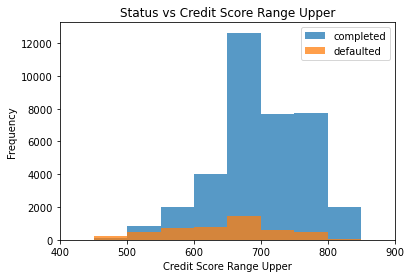

In [117]:
# To understand the relationship between the the Loan staus and Credit scor upper range
# plot the bar plot for Loan Status and CreditScoreRangeUpper
completed=df['LoanStatus']=='Completed'
defaulted=df['LoanStatus']=='Defaulted'
bins = np.arange(400, 900, 50)
df['CreditScoreRangeUpper'][completed].plot(kind='hist', label='completed', bins=bins, alpha=0.75)
df['CreditScoreRangeUpper'][defaulted].plot(kind='hist', label='defaulted' ,bins=bins,alpha=0.75)

pt.xlabel('Credit Score Range Upper')
pt.ylabel('Frequency')
pt.title('Status vs Credit Score Range Upper');
pt.legend()
pt.xlim((400, 900));

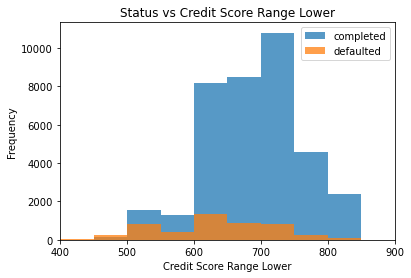

In [138]:
# To understand the relationship between the the Loan staus and Credit score lower range
# plot the bar plot for Loan Status and CreditScoreRangeLower
completed=df['LoanStatus']=='Completed'
defaulted=df['LoanStatus']=='Defaulted'
bins = np.arange(400, 900, 50)
df['CreditScoreRangeLower'][completed].plot(kind='hist', label='completed', bins=bins, alpha=0.75)
df['CreditScoreRangeLower'][defaulted].plot(kind='hist', label='defaulted' ,bins=bins,alpha=0.75)

pt.xlabel('Credit Score Range Lower')
pt.ylabel('Frequency')
pt.title('Status vs Credit Score Range Lower');
pt.legend()
pt.xlim((400, 900));

# Findings
> Looking at the univariate analysis starting with the simple statistical mean for the CrediScoreRangeUpper of 704.5677306653962 and that of the CreditScoreRangeLower 685.5677306653962. IT seems the the compan's customers have relative high score to borrow money. 
> Loan status vs the Creditscorerangeupper the majority of loans that have completed loan stauts above the score range is from score of 600 to 850. 
> Loan status vs the CreditscorerangeLower the maximum loans with completed status have also the range of 600 to 850
> From both the plots we can see that defualted loans range starts are very low of 450 to to 850. 
>  Thes findigs jives with the mean of the  CreditScoreRangeLower 685.5677306653962 to CrediScoreRangeUpper of 704.5677306653962.  The majority of the completed loans lie between those means. So we can say that company does not lend too high credit risk individuals. 

# Multi-Variate Analysis
> How does the Credit Score range effect the lending and borrowing rates and various out factors in our analsis of creditscore range upper

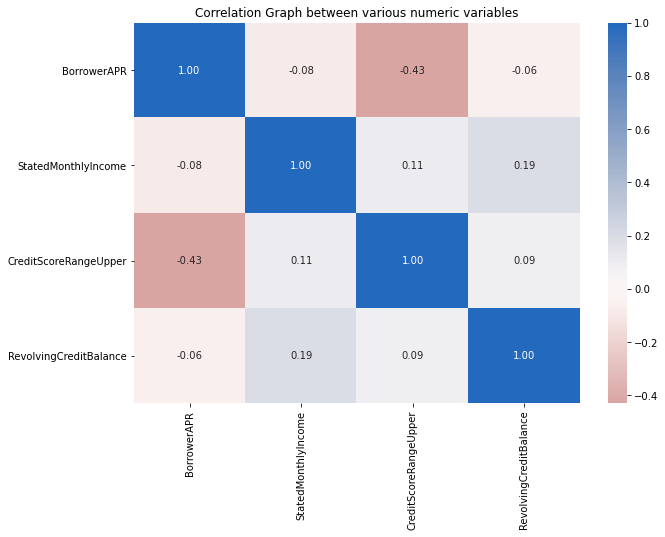

In [147]:
# draw a heat map of BorrowerAPR, StatedMonbhtlyIncome, CreditScoreUpper
num = ['BorrowerAPR', 'StatedMonthlyIncome',  'CreditScoreRangeUpper','RevolvingCreditBalance']
pt.figure(figsize = [10, 7])
sn.heatmap(df[num].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
pt.title('Correlation Graph between various numeric variables') 
pt.show()

# Findings
> From the head map we can see CreditScoreRangeUpper has the very slight positive correlation with RevolvingCredit Balance. Higher credit score range customers may have slight higher creditbalance.
> Higher the income has positive relation with CreditScoreRangeUpper, therefor the higher income may results in higher credit score.
> Higher credit score decreases the Borrower APR.


# Conclusion
Looking at the analysis of the data the Prosper Loan company is lending to medium to high credit score individuals. 60 to 80 percent of its customers have a credit score rage greated than 600 all the way 850 credit score. It's portfolio has as very low portfolio of customers that have high credit risk. The company does not belive in exposing itself to high credit risk and long term loans more than 3 years. While like any conventional loan company the APR of the borrowers decreases as the creditscore increases. The company believes in playing it safe by lending to money to customers with low credit risk and not locking in long term contracts more than 5 years, most at 3 years. Majority of the investors only want to invest in 3 years contracts.